In [179]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.io import ascii
import pandas as pd
import astropy.io.fits as pyfits
import astropy.constants as const
from astropy import units as u
import re
import os
import sys
sys.path.append('/Users/armna254/Documents/GitHub/DCBH-Codes2/Codes')
import default_rcparams
import seaborn as sns

%matplotlib inline

In [180]:
path_to_data = '/Users/armna254/Documents/Data/Lensed-Stars/BoOST-stellarmodels-SMC'        #--path to the data forlder
apcorrected_fits_file = sorted([file for file in os.listdir(path_to_data) if file.endswith('.dat')])       #--sorted *.dat filenames 

In [181]:
#--Read column names from the text file
with open(os.path.join(path_to_data,'fdat-columns.txt'), 'r') as file:
    #--Read the first line
    column_names_line = file.readline().strip()
    #--Split the line by spaces
    column_names_split = column_names_line.split()
    #--Extract column names from each item after the first character
    column_names = [item.split(':')[1] for item in column_names_split]

In [182]:
#--Read all the .dat files and convert them into a single dataframe
def dat_to_df(data_path, dat_files):    
    dfs = []
    for dat_file in dat_files:
        #--path to the dat files
        dat_file_path = os.path.join(data_path,dat_file)
        df = pd.read_csv(dat_file_path, sep='\s')
        df.columns = column_names
        dfs.append(df)
    #--Concat all the single dat files stored in dfs into one df    
    all_dfs = pd.concat(dfs, ignore_index=True)
    return all_dfs

In [183]:
data_SMC = dat_to_df(path_to_data, apcorrected_fits_file)

/var/folders/4c/kn228nps28n6q5djhg2n0k540000gn/T/ipykernel_91372/3821141763.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(dat_file_path, sep='\s')
/var/folders/4c/kn228nps28n6q5djhg2n0k540000gn/T/ipykernel_91372/3821141763.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(dat_file_path, sep='\s')
/var/folders/4c/kn228nps28n6q5djhg2n0k540000gn/T/ipykernel_91372/3821141763.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can

In [184]:
pd.set_option('display.max_columns', data_SMC.shape[1]+1)
data_SMC.head()

,t[yr],M/Msun,Teff[K],log(L/Lsun),R/Rsun,log(Mdot[Msun/yr],logg,v_surf[km/s],v_crit[km/s],Gamma,flag_extrapol,H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,coreHe[Msun],coreCO[Msun],sH1,sH2,sHe3,sHe4,sLi6,sLi7,sBe7,sBe9,sB8,sB10,sB11,sC11,sC12,sC13,sN12,sN14,sN15,sO16,sO17,sO18,sF19,sNe20,sNe21,sNe22,sNa23,sMg24,sMg25,sMg26,sAl26,sAl27,sSi28,sSi29,sSi30,sFe56,cH1,cH2,cHe3,cHe4,cLi6,cLi7,cBe7,cBe9,cB8,cB10,cB11,cC11,cC12,cC13,cN12,cN14,cN15,cO16,cO17,cO18,cF19,cNe20,cNe21,cNe22,cNa23,cMg24,cMg25,cMg26,cAl26,cAl27,cSi28,cSi29,cSi30,cFe56
0,1829433.0,8.99988,26745.02579,3.63911,3.07199,-10.1919,4.41712,119.89725,742.581,0.01294,0,12.0,10.92544,2.36162,0.65153,1.99988,7.37001,6.50001,7.98,3.86001,7.14,5.47,6.72001,5.67001,3.04156,1.55037,0.746449,2.267670e-13,0.000031,0.251437,3.513500e-11,1.160490e-09,1.970200e-23,3.011410e-11,2.870520e-41,1.479450e-10,6.581270e-10,1.802980e-62,0.000208,0.000003,1.400010e-99,0.000033,1.296970e-07,0.001138,4.508170e-07,0.000003,1.027450e-07,0.000192,4.821030e-07,0.000015,0.000005,0.000074,0.00001,0.000011,8.069380e-17,0.000009,0.000122,0.000006,0.000004,0.000252,0.717794,3.572730e-12,0.000001,0.279898,1.061700e-49,1.172200e-16,1.770110e-10,2.187760e-46,1.227440e-17,7.961590e-38,8.452790e-32,9.705100e-31,0.000009,0.000003,1.399590e-99,0.001076,4.216970e-08,0.000182,0.000034,1.247380e-10,3.184200e-11,0.000191,2.798980e-07,5.260170e-07,0.000022,0.000074,0.000005,0.000015,0.000001,0.00001,0.000122,0.000006,0.000004,0.000252
1,1829433.0,8.99988,26745.02579,3.63911,3.07199,-10.1919,4.41712,119.89725,742.581,0.01294,0,12.0,10.92544,2.36162,0.65153,1.99988,7.37001,6.50001,7.98,3.86001,7.14,5.47,6.72001,5.67001,3.04156,1.55037,0.746449,2.267670e-13,0.000031,0.251437,3.513500e-11,1.160490e-09,1.970200e-23,3.011410e-11,2.870520e-41,1.479450e-10,6.581270e-10,1.802980e-62,0.000208,0.000003,1.400010e-99,0.000033,1.296970e-07,0.001138,4.508170e-07,0.000003,1.027450e-07,0.000192,4.821030e-07,0.000015,0.000005,0.000074,0.00001,0.000011,8.069380e-17,0.000009,0.000122,0.000006,0.000004,0.000252,0.717794,3.572730e-12,0.000001,0.279898,1.061700e-49,1.172200e-16,1.770110e-10,2.187760e-46,1.227440e-17,7.961590e-38,8.452790e-32,9.705100e-31,0.000009,0.000003,1.399590e-99,0.001076,4.216970e-08,0.000182,0.000034,1.247380e-10,3.184200e-11,0.000191,2.798980e-07,5.260170e-07,0.000022,0.000074,0.000005,0.000015,0.000001,0.00001,0.000122,0.000006,0.000004,0.000252
2,1839291.0,8.99988,26744.08302,3.63922,3.07262,-10.1917,4.41694,119.89236,742.504,0.01294,0,12.0,10.92544,2.35996,0.65105,1.99987,7.37001,6.50001,7.98,3.86001,7.14,5.47,6.72001,5.67001,3.04156,1.55037,0.746449,2.300780e-13,0.000031,0.251437,3.485770e-11,1.156230e-09,1.962240e-23,3.008130e-11,2.845750e-41,1.479450e-10,6.581180e-10,1.774530e-62,0.000208,0.000003,1.400010e-99,0.000033,1.296970e-07,0.001138,4.508170e-07,0.000003,1.027450e-07,0.000192,4.821030e-07,0.000015,0.000005,0.000074,0.00001,0.000011,7.993050e-17,0.000009,0.000122,0.000006,0.000004,0.000252,0.717667,3.572730e-12,0.000001,0.280047,8.979060e-50,1.172820e-16,1.770110e-10,1.859780e-46,1.226570e-17,6.798050e-38,8.458780e-32,9.703380e-31,0.000009,0.000003,1.399590e-99,0.001077,4.221450e-08,0.000180,0.000034,1.240550e-10,3.148860e-11,0.000191,2.799970e-07,5.188920e-07,0.000022,0.000074,0.000005,0.000015,0.000001,0.00001,0.000122,0.000006,0.000004,0.000252
3,1849150.0,8.99988,26743.14025,3.63934,3.07326,-10.1915,4.41676,119.88747,742.425,0.01294,0,12.0,10.92544,2.35830,0.65058,1.99987,7.37001,6.50001,7.98,3.86001,7.14,5.47,6.72001,5.67001,3.04156,1.55037,0.746449,2.334370e-13,0.000031,0.251437,3.458270e-11,1.152000e-09,1.954310e-23,3.004860e-11,2.821190e-41,1.479440e-10,6.581090e-10,1.746520e-62,0.000208,0.000003,1.400010e-99,0.000033,1.296970e-07,0.001138,4.508170e-07,0.000003,1.027450e-07,0.000192,4.821030e-07,0.000015,0.000005,0.000074,0.00001,0.000011,7.917440e-17,0.000009,0.000122,0.000006,0.000004,0.000252,0.717540,3.572730e-12,0.000001,0.280196,7.593840e-50,1.173440e-16,1.770110e-10,1.580970e-46,1.225700e-17,5.8

In [186]:
#--each track has 607 rows so we group the datafram for every 607 rows:
tracks = data_SMC.groupby(data_SMC.index // 607)
#--checking what temperature each track covers:
for i, track in enumerate(tracks):
    print(track[1]['t[yr]'].iloc[0], track[1]['t[yr]'].iloc[-1])

1829433.0 27630760.0
1147683.0 17246220.0
841476.2 12537320.0
351668.2 5962732.0
269374.4 4748579.0
222349.0 3856816.0
162921.7 2933212.0
130885.8 2521151.0
108728.3 2202885.0
10135.66 1927648.0


In [187]:
#--For any given age e.g. 1000000 years, we need to interpolate the temperature and luminosity of each track.
#--below the interpolation takes place linearly.
def interpolated_ages(df_grouped, target_ages):
    interpolated_data = pd.DataFrame(columns = ['Track', 'age[yr]', 'log(L/Lsun)', 'Teff[K]'])
    for target_age in target_ages:
        for track_index, trackdata in df_grouped:
            age = trackdata['t[yr]']
            luminosity = trackdata['log(L/Lsun)']
            temperature = trackdata['Teff[K]']
            #check if the target luminosity is in the age coverage of the track
            if (age.min() <= target_age) and (age.max() >= target_age):
                interpolated_luminosity = np.interp(target_age, age, luminosity)
                interpolated_temperature = np.interp(target_age, age, temperature)
            #append the interpolated data to the dataframe
                interpolated_data = interpolated_data.append({'Track': track_index,
                                        'age[yr]': target_age,
                                        'log(L/Lsun)': interpolated_luminosity,
                                        'Teff[K]': interpolated_temperature},
                                        ignore_index = True)
    return interpolated_data

In [189]:
#--given ages that we want to interpolate luminosity and temperature
target_ages = [1e6 ,2e6, 3e6, 4e6, 10e6]
interpolated_result = interpolated_ages(tracks, target_ages)
#--group the interpolated data based on the given age for plotting purposes
grouped_by_age = interpolated_result.groupby('age[yr]')

/var/folders/4c/kn228nps28n6q5djhg2n0k540000gn/T/ipykernel_91372/2873586227.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpolated_data = interpolated_data.append({'Track': track_index,
/var/folders/4c/kn228nps28n6q5djhg2n0k540000gn/T/ipykernel_91372/2873586227.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpolated_data = interpolated_data.append({'Track': track_index,
/var/folders/4c/kn228nps28n6q5djhg2n0k540000gn/T/ipykernel_91372/2873586227.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpolated_data = interpolated_data.append({'Track': track_index,
/var/folders/4c/kn228nps28n6q5djhg2n0k540000gn/T/ipykernel_91372/2873586227.py:13: FutureWarning: The frame.append method is deprecated and wi

In [190]:
interpolated_result

,Track,age[yr],log(L/Lsun),Teff[K]
0,2.0,1000000.0,4.300668,33451.456617
1,3.0,1000000.0,5.108124,42675.643273
2,4.0,1000000.0,5.400881,46055.590427
3,5.0,1000000.0,5.694861,49125.649456
4,6.0,1000000.0,6.172746,52298.705131
5,7.0,1000000.0,6.453007,51460.107228
6,8.0,1000000.0,6.769323,44622.531523
7,9.0,1000000.0,7.228851,26786.943400
8,0.0,2000000.0,3.641137,26729.034406
9,1.0,2000000.0,4.033665,30374.861829


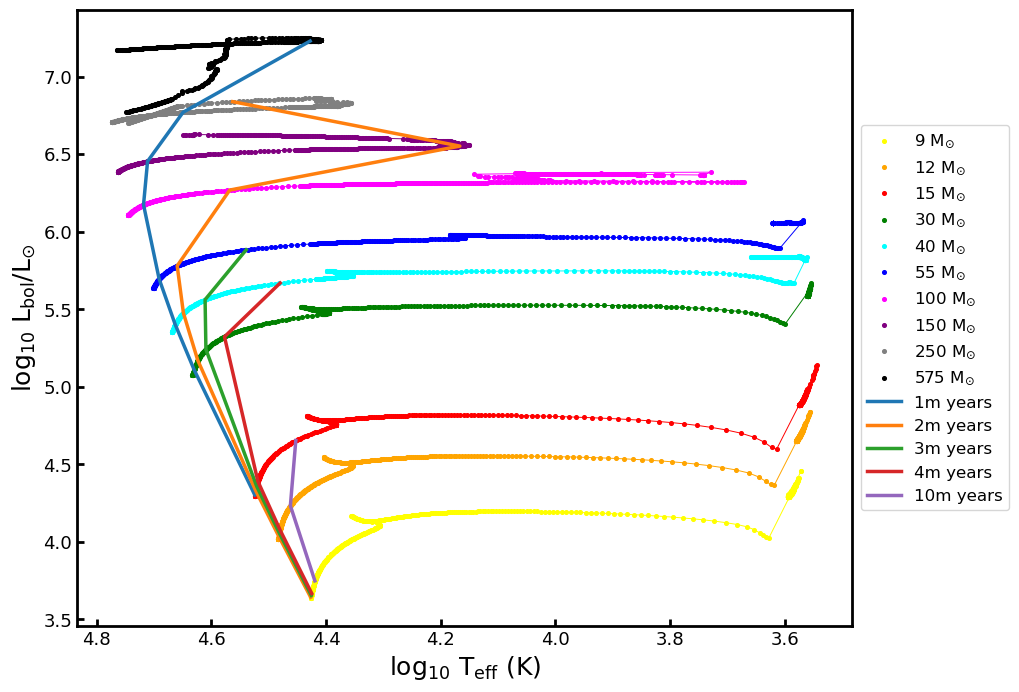

In [195]:
# Group the data by 'Mass'
grouped_data = data_SMC.groupby(data_SMC.index // 607)

# Define colors for each group
colors = ['yellow', 'orange', 'red', 'green', 'cyan', 'blue', 'magenta', 'purple', 'gray', 'black']
# Define group names
group_names = ['9', '12', '15', '30', '40', '55', '100', '150', '250', '575']

plt.figure(figsize=(10, 8))
# Plot each group separately and add legend
for i, (group_name, group_data) in enumerate(grouped_data):
    plt.scatter(np.log10(group_data['Teff[K]']), group_data['log(L/Lsun)'], label=f'{group_names[i]} M$_{{\odot}}$', color=colors[i], s=7)
    plt.plot(np.log10(group_data['Teff[K]']), group_data['log(L/Lsun)'], color=colors[i], alpha=1, linewidth=0.7)

for age, group in grouped_by_age:
    plt.plot(np.log10(group['Teff[K]']), group['log(L/Lsun)'], label=f'{age/1e6:.0f}m years')
    
plt.xlabel('Temperature (K)')

plt.xlabel(r'log$_{10}$ T$_{\rm eff}$ (K)')
plt.ylabel(r'log$_{10}$ L$_{\rm bol}$/L$_{\odot}$')
#plt.title('Luminosity vs Temperature with Mass Color Groups')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().invert_xaxis()
plt.show()

Let's do get the same results for Interpolated tracks SMC: 